<a href="https://colab.research.google.com/github/chaandini2001/intro-ml-course-winter2025/blob/main/Datathon_2_Code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Upload Data**

Data = Datathon #2 - Cardiovascular Health.csv

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, roc_curve
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import warnings
import statsmodels.api as sm

In [ ]:
from google.colab import files
import pandas as pd
import io
uploaded = files.upload()

Saving Datathon #2 - Cardiovascular Health.csv to Datathon #2 - Cardiovascular Health.csv


In [ ]:
df = pd.read_csv('Datathon #2 - Cardiovascular Health.csv')
df

,id,gender,age,hypertension,heart_disease,ever_married,employment,residence_type,random_glucose,bmi,smoking_status,stroke
0,9046,Male,67,0,1,Yes,Private Sector,Urban,228.69,36.6,Former Smoker,1
1,51676,Female,61,0,0,Yes,Self-employed,Rural,202.21,NaN,Never Smoker,1
2,31112,Male,80,0,1,Yes,Private Sector,Rural,105.92,32.5,Never Smoker,1
3,60182,Female,49,0,0,Yes,Private Sector,Urban,171.23,34.4,Active Smoker,1
4,1665,Female,79,1,0,Yes,Self-employed,Rural,174.12,24.0,Never Smoker,1
...,...,...,...,...,...,...,...,...,...,...,...,...
4249,18234,Female,80,1,0,Yes,Private Sector,Urban,83.75,NaN,Never Smoker,0
4250,44873,Female,81,0,0,Yes,Self-employed,Urban,125.20,40.0,Never Smoker,0
4251,19723,Female,35,0,0,Yes,Self-employed,Rural,82.99,30.6,Never Smoker,0
4252,37544,Male,51,0,0,Yes,Private Sector,Rural,166.29,25.6,Former Smoker,0


# **Data Preparation**

## Creating "HD_Stroke" Variable

In [ ]:
df['HD_Stroke'] = ((df['heart_disease'] == 1) | (df['stroke'] == 1)).astype(int)
df

,id,gender,age,hypertension,heart_disease,ever_married,employment,residence_type,random_glucose,bmi,smoking_status,stroke,HD_Stroke
0,9046,1,67,0,1,Yes,Private Sector,Urban,228.69,36.6,1,1,1
1,51676,0,61,0,0,Yes,Self-employed,Rural,202.21,29.2,2,1,1
2,31112,1,80,0,1,Yes,Private Sector,Rural,105.92,32.5,2,1,1
3,60182,0,49,0,0,Yes,Private Sector,Urban,171.23,34.4,0,1,1
4,1665,0,79,1,0,Yes,Self-employed,Rural,174.12,24.0,2,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4249,18234,0,80,1,0,Yes,Private Sector,Urban,83.75,29.2,2,0,0
4250,44873,0,81,0,0,Yes,Self-employed,Urban,125.20,40.0,2,0,0
4251,19723,0,35,0,0,Yes,Self-employed,Rural,82.99,30.6,2,0,0
4252,37544,1,51,0,0,Yes,Private Sector,Rural,166.29,25.6,1,0,0


In [ ]:
# Frequency of HD_Stroke
hd_stroke_counts = df['HD_Stroke'].value_counts()
print(hd_stroke_counts)

hd_stroke_percentage = df['HD_Stroke'].value_counts(normalize=True) * 100
hd_stroke_percentage

HD_Stroke
0    3779
1     475
Name: count, dtype: int64


,proportion
HD_Stroke,
0,88.834039
1,11.165961


In [ ]:
print(df.dtypes)
#All variables are integer

id                   int64
gender               int64
age                  int64
hypertension      category
heart_disease        int64
ever_married        object
employment          object
residence_type      object
random_glucose     float64
bmi                float64
smoking_status       int64
stroke               int64
HD_Stroke            int64
dtype: object


##Descriptive Statistics: Categorical varaibles by [HD_Stroke]

In [ ]:
# Convert 'gender' and 'smoking_status' to categorical
df['gender'] = df['gender'].astype('category')
df['smoking_status'] = df['smoking_status'].astype('category')
df['hypertension'] = df['hypertension'].astype('category')

In [ ]:
variable_list = ['gender', 'smoking_status', 'hypertension']

variable_list = ['gender', 'smoking_status', 'hypertension']

for var in variable_list:
    print(f"\nFrequency Table for {var} by HD_Stroke:")
    print(pd.crosstab(df[var], df['HD_Stroke'], normalize='index'))


Frequency Table for gender by HD_Stroke:
HD_Stroke         0         1
gender                       
0          0.909550  0.090450
1          0.855695  0.144305
2          1.000000  0.000000

Frequency Table for smoking_status by HD_Stroke:
HD_Stroke              0         1
smoking_status                    
0               0.887179  0.112821
1               0.843023  0.156977
2               0.904110  0.095890
3               0.902552  0.097448

Frequency Table for hypertension by HD_Stroke:
HD_Stroke            0         1
hypertension                    
0             0.904711  0.095289
1             0.764588  0.235412


##Descriptive Statistics of Continuous variables

In [ ]:
df.describe()
# Good! there is no 0 in age, bmi, random_glucose

,id,age,heart_disease,random_glucose,bmi,stroke,HD_Stroke
count,4254.000000,4254.000000,4254.000000,4254.000000,4254.000000,4254.000000,4254.000000
mean,36596.556653,50.202163,0.064645,108.514394,30.380301,0.058063,0.111660
std,21177.398549,17.829035,0.245927,47.769400,7.083884,0.233890,0.314984
min,84.000000,18.000000,0.000000,55.120000,11.300000,0.000000,0.000000
25%,17887.000000,36.000000,0.000000,77.482500,25.600000,0.000000,0.000000
50%,37089.500000,50.500000,0.000000,92.465000,29.200000,0.000000,0.000000
75%,54771.000000,64.000000,0.000000,116.135000,33.800000,0.000000,0.000000
max,72918.000000,82.000000,1.000000,271.740000,92.000000,1.000000,1.000000


In [ ]:
import plotly.express as px
import pandas as pd

# Create an interactive box plot for the 'bmi' feature
fig_box = px.box(df, x='HD_Stroke', y='bmi', title='Box Plot of bmi Grouped by HD_Stroke', color='HD_Stroke', color_discrete_sequence=['#0d7b94', '#82153d'])
fig_box.update_layout(template="plotly_white")
fig_box.show('colab')


In [ ]:
# Create an interactive box plot for the 'Age' feature
fig_box = px.box(df, x='HD_Stroke', y='age', title='Box Plot of age Grouped by HD_Stroke', color='HD_Stroke', color_discrete_sequence=['#0d7b94', '#82153d'])
fig_box.update_layout(template="plotly_white")
fig_box.show('colab')

In [ ]:
# Create an interactive box plot for the 'random_glucose' feature
fig_box = px.box(df, x='HD_Stroke', y='random_glucose', title='Box Plot of random_glucose Grouped by HD_Stroke', color='HD_Stroke', color_discrete_sequence=['#0d7b94', '#82153d'])
fig_box.update_layout(template="plotly_white")
fig_box.show('colab')

##Missing data

In [ ]:
print(df.isna().sum())
#BMI ha 181 missing

id                0
gender            0
age               0
hypertension      0
heart_disease     0
ever_married      0
employment        0
residence_type    0
random_glucose    0
bmi               0
smoking_status    0
stroke            0
HD_Stroke         0
dtype: int64


HD_Stroke
0    0.0
1    0.0
Name: bmi, dtype: float64


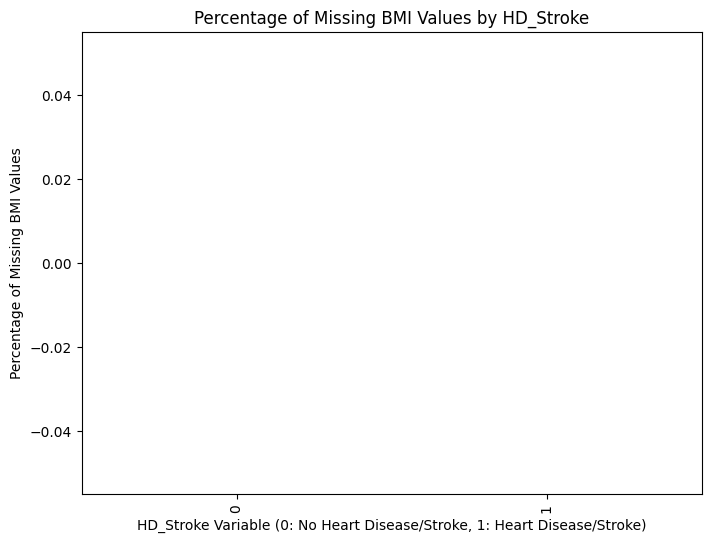

In [ ]:
# prompt: check if missing in bmi is random by HD_Stroke
import matplotlib.pyplot as plt

missing_bmi_by_HD_Stroke = df.groupby('HD_Stroke')['bmi'].apply(lambda x: x.isnull().sum() / len(x) * 100)
print(missing_bmi_by_HD_Stroke)

#Visualize the distribution of missing BMI values by HD_Stroke
plt.figure(figsize=(8, 6))
missing_bmi_by_HD_Stroke.plot(kind='bar')
plt.title('Percentage of Missing BMI Values by HD_Stroke')
plt.xlabel('HD_Stroke Variable (0: No Heart Disease/Stroke, 1: Heart Disease/Stroke)')
plt.ylabel('Percentage of Missing BMI Values')
plt.show()

#BMI missing is more in HD_Stroke=1

In [ ]:
# prompt: replace "NAN' in bmi with median of this varaible
variables_to_impute = ['bmi']

for variable in variables_to_impute:
    median_value = df[variable].median()
    df[variable] = df[variable].fillna(median_value)

df


,id,gender,age,hypertension,heart_disease,ever_married,employment,residence_type,random_glucose,bmi,smoking_status,stroke,HD_Stroke
0,9046,1,67,0,1,Yes,Private Sector,Urban,228.69,36.6,1,1,1
1,51676,0,61,0,0,Yes,Self-employed,Rural,202.21,29.2,2,1,1
2,31112,1,80,0,1,Yes,Private Sector,Rural,105.92,32.5,2,1,1
3,60182,0,49,0,0,Yes,Private Sector,Urban,171.23,34.4,0,1,1
4,1665,0,79,1,0,Yes,Self-employed,Rural,174.12,24.0,2,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4249,18234,0,80,1,0,Yes,Private Sector,Urban,83.75,29.2,2,0,0
4250,44873,0,81,0,0,Yes,Self-employed,Urban,125.20,40.0,2,0,0
4251,19723,0,35,0,0,Yes,Self-employed,Rural,82.99,30.6,2,0,0
4252,37544,1,51,0,0,Yes,Private Sector,Rural,166.29,25.6,1,0,0


##Correlation Matrix

,bmi,random_glucose,smoking_status,age,gender,HD_Stroke
count,4254.000000,4254.000000,4254.000000,4254.000000,4254.000000,4254.000000
mean,30.380301,108.514394,1.633756,50.202163,0.394687,0.111660
std,7.083884,47.769400,1.002160,17.829035,0.489322,0.314984
min,11.300000,55.120000,0.000000,18.000000,0.000000,0.000000
25%,25.600000,77.482500,1.000000,36.000000,0.000000,0.000000
50%,29.200000,92.465000,2.000000,50.500000,0.000000,0.000000
75%,33.800000,116.135000,2.000000,64.000000,1.000000,0.000000
max,92.000000,271.740000,3.000000,82.000000,2.000000,1.000000


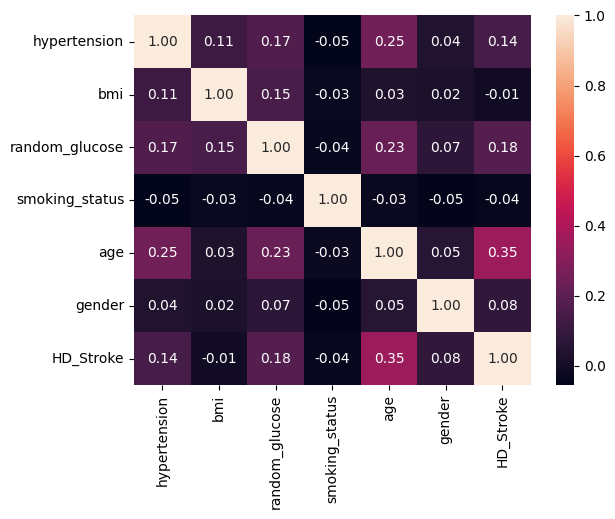

In [ ]:
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder
le = LabelEncoder()

df['smoking_status'] = le.fit_transform(df['smoking_status'])
df['gender'] = le.fit_transform(df['gender'])
data=df[['hypertension', 'bmi', 'random_glucose','smoking_status', 'age', 'gender', 'HD_Stroke']]

corr_matrix = data.corr()
sns.heatmap(corr_matrix, annot=True, fmt=".2f")

data.describe()

# smoking ad gender have a very low correlations with all other varaibles

#**Model 1 - Categorizing BMI and random_glucose**

##Preparing Data for Model 1

In [ ]:
import pandas as pd
import numpy as np

df_filter = df.loc[df['bmi'] >= 16].copy()
df_filter2 = df_filter.loc[df_filter['bmi'] <= 58].copy()
df_filter2['diabetes'] = np.where(df_filter2['random_glucose'] >=200, 'Yes', 'No')
df_filter2['obesity'] = np.where(df_filter2['bmi'] >=30, 'Yes', 'No')

df_filter2['diabetes'] = le.fit_transform(df_filter2['diabetes'])
df_filter2['obesity'] = le.fit_transform(df_filter2['obesity'])
df_filter2

,id,gender,age,hypertension,heart_disease,ever_married,employment,residence_type,random_glucose,bmi,smoking_status,stroke,HD_Stroke,diabetes,obesity
0,9046,1,67,0,1,Yes,Private Sector,Urban,228.69,36.6,1,1,1,1,1
1,51676,0,61,0,0,Yes,Self-employed,Rural,202.21,29.2,2,1,1,1,0
2,31112,1,80,0,1,Yes,Private Sector,Rural,105.92,32.5,2,1,1,0,1
3,60182,0,49,0,0,Yes,Private Sector,Urban,171.23,34.4,0,1,1,0,1
4,1665,0,79,1,0,Yes,Self-employed,Rural,174.12,24.0,2,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4249,18234,0,80,1,0,Yes,Private Sector,Urban,83.75,29.2,2,0,0,0,0
4250,44873,0,81,0,0,Yes,Self-employed,Urban,125.20,40.0,2,0,0,0,1
4251,19723,0,35,0,0,Yes,Self-employed,Rural,82.99,30.6,2,0,0,0,1
4252,37544,1,51,0,0,Yes,Private Sector,Rural,166.29,25.6,1,0,0,0,0


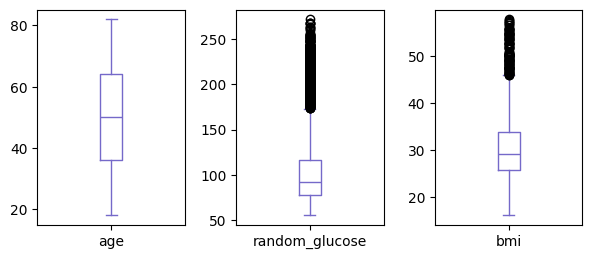

In [ ]:
# Drop the binary var column for better visualization
description = df_filter2.drop(['hypertension','heart_disease', 'stroke','gender','id', 'HD_Stroke','diabetes', 'smoking_status','obesity'], axis=1)
description.plot(kind='box', subplots=True, layout=(2, 5), figsize=(10, 5), color='#7569c9')
plt.tight_layout()
plt.show()

# there are outliers in bmi and random_glucose

In [ ]:
X = df_filter2[['hypertension', 'diabetes','smoking_status', 'age', 'gender', 'obesity']]
y = df_filter2['HD_Stroke']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

##Logistic Regression Model






In [ ]:
log_reg = LogisticRegression(penalty='l1', C=1.0, solver='liblinear')
log_reg.fit(X_train, y_train)

LogisticRegression(penalty='l1', solver='liblinear')

##Confusion Matrix

Confusion Matrix:
[[743   9]
 [ 90   5]]

Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.99      0.94       752
           1       0.36      0.05      0.09        95

    accuracy                           0.88       847
   macro avg       0.62      0.52      0.51       847
weighted avg       0.83      0.88      0.84       847



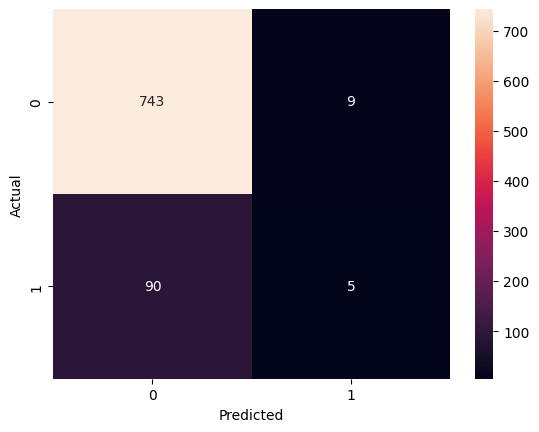

In [ ]:
y_pred = log_reg.predict(X_test)

conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print("Confusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(class_report)

sns.heatmap(conf_matrix, annot=True, fmt='d')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

## Model Summary

In [ ]:
X = sm.add_constant(X)

log_reg = sm.Logit(y, X).fit()

summary = log_reg.summary()
print(summary)

Optimization terminated successfully.
         Current function value: 0.273935
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:              HD_Stroke   No. Observations:                 4234
Model:                          Logit   Df Residuals:                     4227
Method:                           MLE   Df Model:                            6
Date:                Wed, 29 Jan 2025   Pseudo R-squ.:                  0.2197
Time:                        03:15:38   Log-Likelihood:                -1159.8
converged:                       True   LL-Null:                       -1486.4
Covariance Type:            nonrobust   LLR p-value:                8.028e-138
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const             -6.8352      0.303    -22.589      0.000      -7.428      -6.242
hypertension     

##Removing Gender and smoking_status since not correlated

In [ ]:
X = df_filter2[['hypertension', 'diabetes', 'age', 'obesity']]
y = df_filter2['HD_Stroke']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
log_reg = LogisticRegression(penalty='l1', C=1.0, solver='liblinear')
log_reg.fit(X_train, y_train)

LogisticRegression(penalty='l1', solver='liblinear')

Confusion Matrix:
[[749   3]
 [ 89   6]]

Classification Report:
              precision    recall  f1-score   support

           0       0.89      1.00      0.94       752
           1       0.67      0.06      0.12        95

    accuracy                           0.89       847
   macro avg       0.78      0.53      0.53       847
weighted avg       0.87      0.89      0.85       847



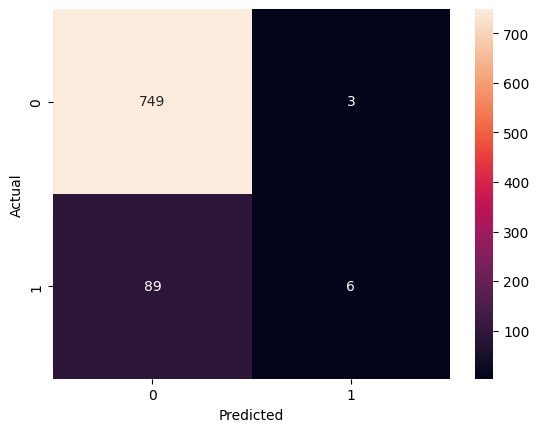

In [ ]:
y_pred = log_reg.predict(X_test)

conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print("Confusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(class_report)

sns.heatmap(conf_matrix, annot=True, fmt='d')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

In [ ]:
X = sm.add_constant(X)

log_reg = sm.Logit(y, X).fit()

summary = log_reg.summary()
print(summary)

Optimization terminated successfully.
         Current function value: 0.277471
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:              HD_Stroke   No. Observations:                 4234
Model:                          Logit   Df Residuals:                     4229
Method:                           MLE   Df Model:                            4
Date:                Wed, 29 Jan 2025   Pseudo R-squ.:                  0.2096
Time:                        03:15:39   Log-Likelihood:                -1174.8
converged:                       True   LL-Null:                       -1486.4
Covariance Type:            nonrobust   LLR p-value:                1.488e-133
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const           -6.7365      0.281    -23.931      0.000      -7.288      -6.185
hypertension     0.3783

#**Model 2 - keeping BMI and random_glucose as continuous**

In [ ]:
X = df_filter2[['hypertension','gender', 'age', 'random_glucose'	, 'bmi',	'smoking_status']]
y = df_filter2['HD_Stroke']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
log_reg = LogisticRegression(penalty='l1', C=1.0, solver='liblinear')
log_reg.fit(X_train, y_train)

LogisticRegression(penalty='l1', solver='liblinear')

## Confusion Matrix

Confusion Matrix:
[[742  10]
 [ 90   5]]

Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.99      0.94       752
           1       0.33      0.05      0.09        95

    accuracy                           0.88       847
   macro avg       0.61      0.52      0.51       847
weighted avg       0.83      0.88      0.84       847



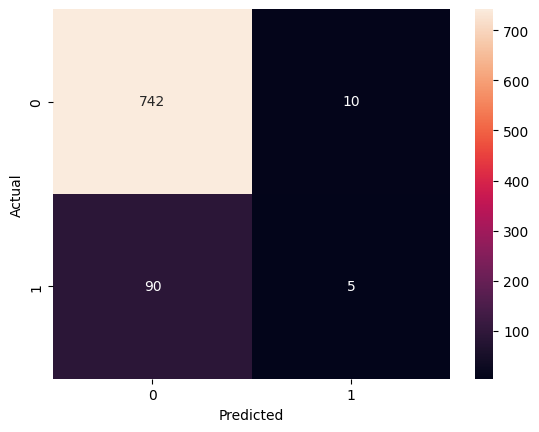

In [ ]:
y_pred = log_reg.predict(X_test)

conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print("Confusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(class_report)

sns.heatmap(conf_matrix, annot=True, fmt='d')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

## Model Summary

In [ ]:
X = sm.add_constant(X)

log_reg = sm.Logit(y, X).fit()

summary = log_reg.summary()
print(summary)

Optimization terminated successfully.
         Current function value: 0.272212
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:              HD_Stroke   No. Observations:                 4234
Model:                          Logit   Df Residuals:                     4227
Method:                           MLE   Df Model:                            6
Date:                Wed, 29 Jan 2025   Pseudo R-squ.:                  0.2246
Time:                        03:15:41   Log-Likelihood:                -1152.5
converged:                       True   LL-Null:                       -1486.4
Covariance Type:            nonrobust   LLR p-value:                5.714e-141
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const             -7.3211      0.435    -16.842      0.000      -8.173      -6.469
hypertension     

#**Model 3 - Continuous BMI and random_glucose, using Hyperparameter Optimization**


L1 REGULARIZATION: [(0.01, 0.0), (0.1, 0.09005947871462669), (1, 0.11491616768846827)]
L2 REGULARIZATION: [(0.01, 0.03531807854592665), (0.1, 0.094465695496467), (1, 0.11929373266794843)]
Best c_val for L1 penalty: (1, 0.11491616768846827)
Best c_val for L2 penalty: (1, 0.11929373266794843)


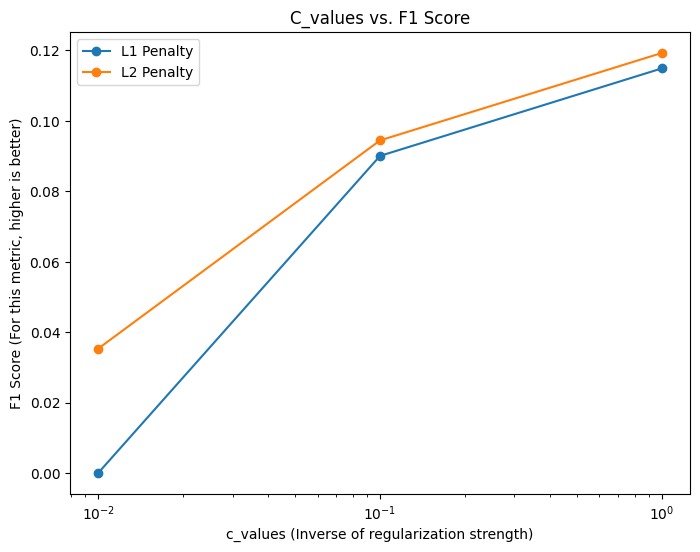

In [ ]:
# Perform Hyperparameter tuning for different regularization strengths
from sklearn.model_selection import cross_val_score
from sklearn.metrics import f1_score, make_scorer
#set choices for c-values (this method of hyperparameter tuning is called a "grid search"):
c_values = [0.01, 0.1, 1]

# Define the F1 scorer, you can use a different metric such as accuracy, AUC, BCE etc for classification tasks, or MSE for linear regression, depending on the context.
f1_scorer = make_scorer(f1_score)

# Initiatlize lists to store average performance scores for L1 and L2
performance_scores_l1 = []
performance_scores_l2 = []

for c in c_values:
  # Training logistic regression model with l1 regularization
  log_reg_l1 = LogisticRegression(penalty='l1', C=c, solver='liblinear')
  perf_scores_l1 = cross_val_score(log_reg_l1, X_train, y_train, cv=5, scoring=f1_scorer)
  mean_perf_scores_l1 = np.mean(perf_scores_l1)
  performance_scores_l1.append((c, mean_perf_scores_l1))

  # Training logistic regression model with l2 regularization
  log_reg_l2 = LogisticRegression(penalty='l2', C=c, solver='liblinear')
  perf_scores_l2 = cross_val_score(log_reg_l2, X_train, y_train, cv=5, scoring=f1_scorer)
  mean_perf_scores_l2 = np.mean(perf_scores_l2)
  performance_scores_l2.append((c, mean_perf_scores_l2))

# Print results
print("L1 REGULARIZATION:", performance_scores_l1)
print("L2 REGULARIZATION:", performance_scores_l2)

# Find the best c values for both L1 and L2
best_cval_l1 = max(performance_scores_l1, key=lambda x: x[1]) #if you use a different performance metric, make sure to change min<->max depending on what denotes a better model performance...
best_cval_l2 = max(performance_scores_l2, key=lambda x: x[1])
print('Best c_val for L1 penalty:', best_cval_l1)
print('Best c_val for L2 penalty:', best_cval_l2)

# The penalty parameter is used to specify the norm used in the penalization: l1 or l2 regularization.
# The C parameter represents inverse of regularization strength, smaller values specify stronger regularization.
# The solver parameter specifies the algorithm to use in the optimization problem.

# Plot resultt
cvals_l1, performance_values_l1 = zip(*performance_scores_l1)
cvals_l2, performance_values_l2 = zip(*performance_scores_l2)

plt.figure(figsize=(8, 6))
plt.semilogx(cvals_l1, performance_values_l1, marker='o', linestyle='-', label='L1 Penalty')
plt.semilogx(cvals_l2, performance_values_l2, marker='o', linestyle='-', label='L2 Penalty')
plt.title('C_values vs. F1 Score')
plt.xlabel('c_values (Inverse of regularization strength)')
plt.ylabel('F1 Score (For this metric, higher is better)')
plt.legend()
plt.show()

this plot indicates that
1)Increasing C improves the model’s F1 score.
2)L2 regularization performs slightly better than L1 for this dataset.
3)The best-performing models are found at c=1 where regularization is weakest.

In [ ]:
X = df_filter2[['hypertension','gender', 'age', 'random_glucose', 'bmi',	'smoking_status']]
y = df_filter2['HD_Stroke']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
log_reg = LogisticRegression(penalty='l2', C=1.0, solver='liblinear')
log_reg.fit(X_train, y_train)

LogisticRegression(solver='liblinear')

Confusion Matrix:
[[742  10]
 [ 90   5]]

Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.99      0.94       752
           1       0.33      0.05      0.09        95

    accuracy                           0.88       847
   macro avg       0.61      0.52      0.51       847
weighted avg       0.83      0.88      0.84       847



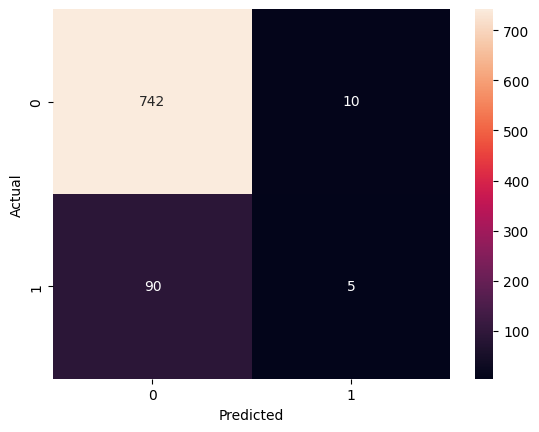

In [ ]:
y_pred = log_reg.predict(X_test)

conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print("Confusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(class_report)

sns.heatmap(conf_matrix, annot=True, fmt='d')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

In [ ]:
# Add Class Weights
log_reg = LogisticRegression(penalty='l1', C=1.0, class_weight={0: 1, 1: 5}, solver='liblinear')
log_reg.fit(X_train, y_train)

#For the minority class (1), each misclassification will be penalized 5 times more heavily than for the majority class.

LogisticRegression(class_weight={0: 1, 1: 5}, penalty='l1', solver='liblinear')

Confusion Matrix:
[[598 154]
 [ 25  70]]

Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.80      0.87       752
           1       0.31      0.74      0.44        95

    accuracy                           0.79       847
   macro avg       0.64      0.77      0.65       847
weighted avg       0.89      0.79      0.82       847



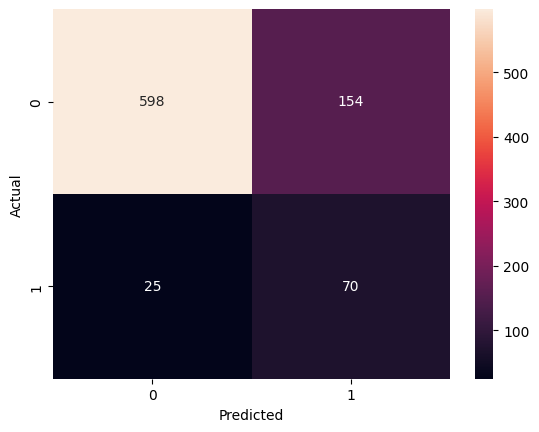

In [ ]:
y_pred = log_reg.predict(X_test)

conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print("Confusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(class_report)

sns.heatmap(conf_matrix, annot=True, fmt='d')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

In [ ]:
X = sm.add_constant(X)

log_reg = sm.Logit(y, X).fit()

summary = log_reg.summary()
print(summary)

Optimization terminated successfully.
         Current function value: 0.272212
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:              HD_Stroke   No. Observations:                 4234
Model:                          Logit   Df Residuals:                     4227
Method:                           MLE   Df Model:                            6
Date:                Wed, 29 Jan 2025   Pseudo R-squ.:                  0.2246
Time:                        03:15:45   Log-Likelihood:                -1152.5
converged:                       True   LL-Null:                       -1486.4
Covariance Type:            nonrobust   LLR p-value:                5.714e-141
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const             -7.3211      0.435    -16.842      0.000      -8.173      -6.469
hypertension     